In [8]:
import time
print(int(time.time()))

1681704853


In [6]:
from glob import glob
import os
print(glob("/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/" + "//*"))
print(os.path.split("/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00165.jpg"))


['/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00085.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00090.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00125.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00045.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00050.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00130.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00120.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00040.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00055.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00135.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00080.jpg', '/Users/liudun/Desktop/anno_tools/AnnotationTools/demo_imgs/282651c6f7/00095.jpg', '/U

In [19]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

sam_checkpoint = "/Users/liudun/Desktop/anno_tools/AnnotationTools/sam_vit_h_4b8939.pth"
device = "cpu"
model_type = "default"

import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
# image = cv2.imread('/Users/liudun/Desktop/anno_tools/AnnotationTools/notebooks/images/truck.jpg')
image = cv2.imread('/Users/liudun/Desktop/anno_tools/AnnotationTools/annotation-api/static/1681906059/obj1080_frame0000018.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)

In [20]:
from segment_anything.utils.transforms import ResizeLongestSide
resize_transform = ResizeLongestSide(sam.image_encoder.img_size)

def prepare_image(image, transform, device):
    image = transform.apply_image(image)
    image = torch.as_tensor(image, device=device.device) 
    return image.permute(2, 0, 1).contiguous()

## 1--只有矩形框的情况

In [5]:
image1 = cv2.imread('/Users/liudun/Desktop/anno_tools/AnnotationTools/notebooks/images/truck.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1_boxes = torch.tensor([
    [75, 275, 1725, 850],
    [425, 600, 700, 875],
    [1375, 550, 1650, 800],
    [1240, 675, 1400, 750],
], device=sam.device)

image2 = cv2.imread('/Users/liudun/Desktop/anno_tools/AnnotationTools/notebooks/images/groceries.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2_boxes = torch.tensor([
    [450, 170, 520, 350],
    [350, 190, 450, 350],
    [500, 170, 580, 350],
    [580, 170, 640, 350],
    [580, 170, 640, 550],
], device=sam.device)

In [6]:
batched_input = [
     {
         'image': prepare_image(image1, resize_transform, sam),
         'boxes': resize_transform.apply_boxes_torch(image1_boxes, image1.shape[:2]),
         'original_size': image1.shape[:2]
     },
     {
         'image': prepare_image(image2, resize_transform, sam),
         'boxes': resize_transform.apply_boxes_torch(image2_boxes, image2.shape[:2]),
         'original_size': image2.shape[:2]
     }
]

In [7]:
batched_output = sam(batched_input, multimask_output=False)

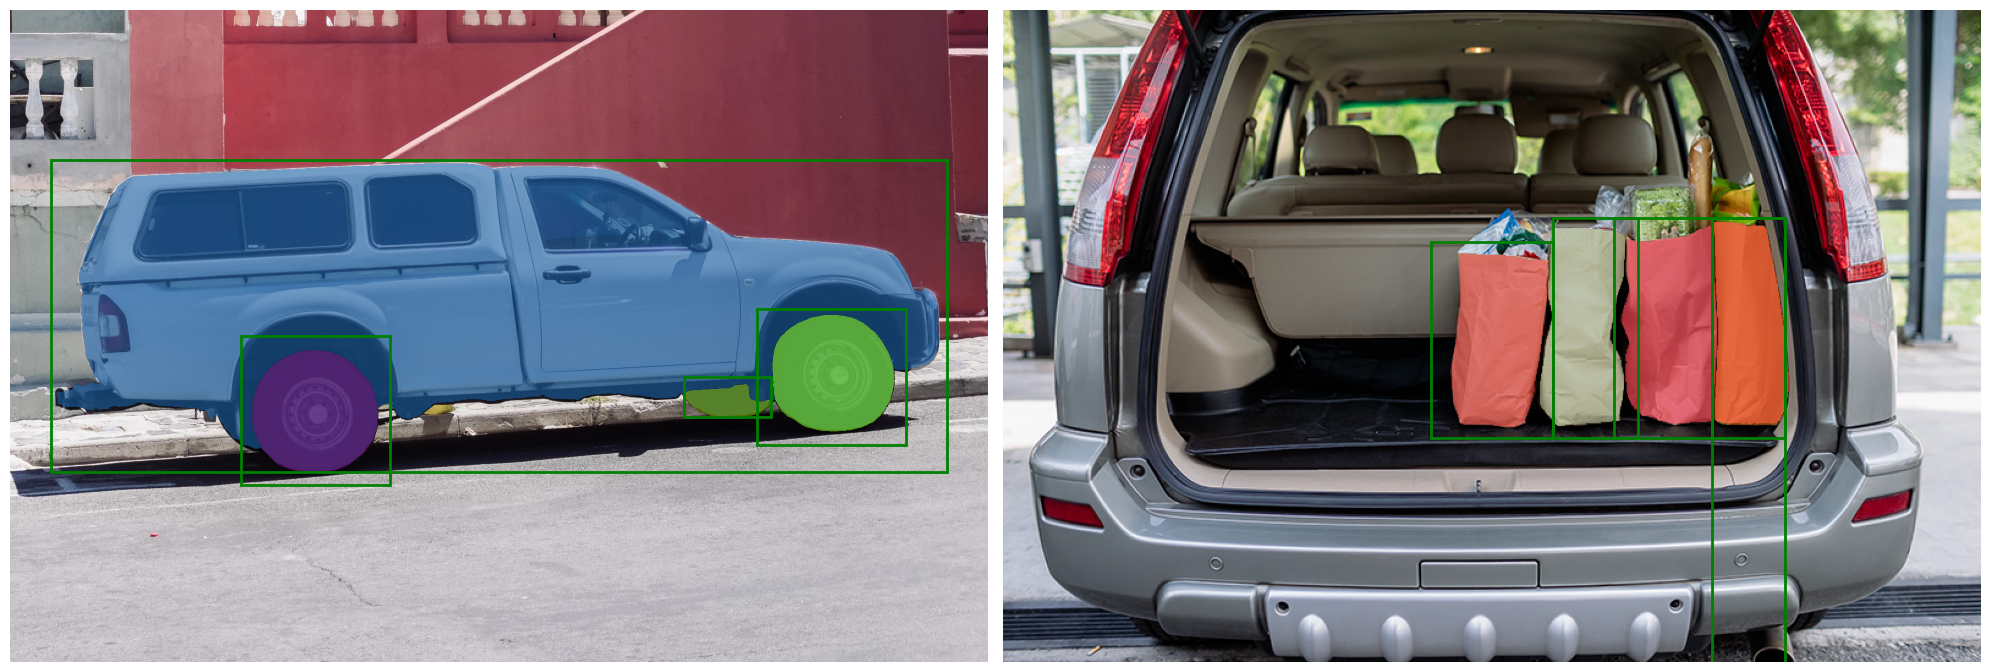

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(image1)
for mask in batched_output[0]['masks']:
    show_mask(mask.cpu().numpy(), ax[0], random_color=True)
for box in image1_boxes:
    show_box(box.cpu().numpy(), ax[0])
ax[0].axis('off')

ax[1].imshow(image2)
for mask in batched_output[1]['masks']:
    show_mask(mask.cpu().numpy(), ax[1], random_color=True)
for box in image2_boxes:
    show_box(box.cpu().numpy(), ax[1])
ax[1].axis('off')

plt.tight_layout()
plt.show()

## 2--只有候选点的情况

In [ ]:
image1 = cv2.imread('/Users/liudun/Desktop/anno_tools/AnnotationTools/notebooks/images/truck.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1_boxes = torch.tensor([
    [75, 275, 1725, 850],
    [425, 600, 700, 875],
    [1375, 550, 1650, 800],
    [1240, 675, 1400, 750],
], device=sam.device)

image2 = cv2.imread('/Users/liudun/Desktop/anno_tools/AnnotationTools/notebooks/images/groceries.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# image2_boxes = torch.tensor([
#     [450, 170, 520, 350],
#     [350, 190, 450, 350],
#     [500, 170, 580, 350],
#     [580, 170, 640, 350],
# ], device=sam.device)



In [38]:
input_point = np.array([[400, 350],[500, 375], [600, 320]])
input_label = np.array([1, 1,1])

transformed_points = predictor.transform.apply_coords(input_point, image2.shape[:2])
in_points = torch.as_tensor(transformed_points, device=predictor.device)
in_labels = torch.tensor(input_label,dtype=torch.int, device=in_points.device)

In [39]:
print(in_points)
print(in_labels)

tensor([[512.0000, 448.3146],
        [640.0000, 480.3371],
        [768.0000, 409.8876]], dtype=torch.float64)
tensor([1, 1, 1], dtype=torch.int32)


In [40]:
batched_input = [
     {
         'image': prepare_image(image1, resize_transform, sam),
         'boxes': resize_transform.apply_boxes_torch(image1_boxes, image1.shape[:2]),
         'original_size': image1.shape[:2]
     },
     {
         'image': prepare_image(image2, resize_transform, sam),
        #  'boxes': resize_transform.apply_boxes_torch(image2_boxes, image2.shape[:2]),
        'point_coords':in_points[:, None, :],
        'point_labels':in_labels[:, None],
         'original_size': image2.shape[:2]
     }
]

In [41]:
batched_output = sam(batched_input, multimask_output=False)

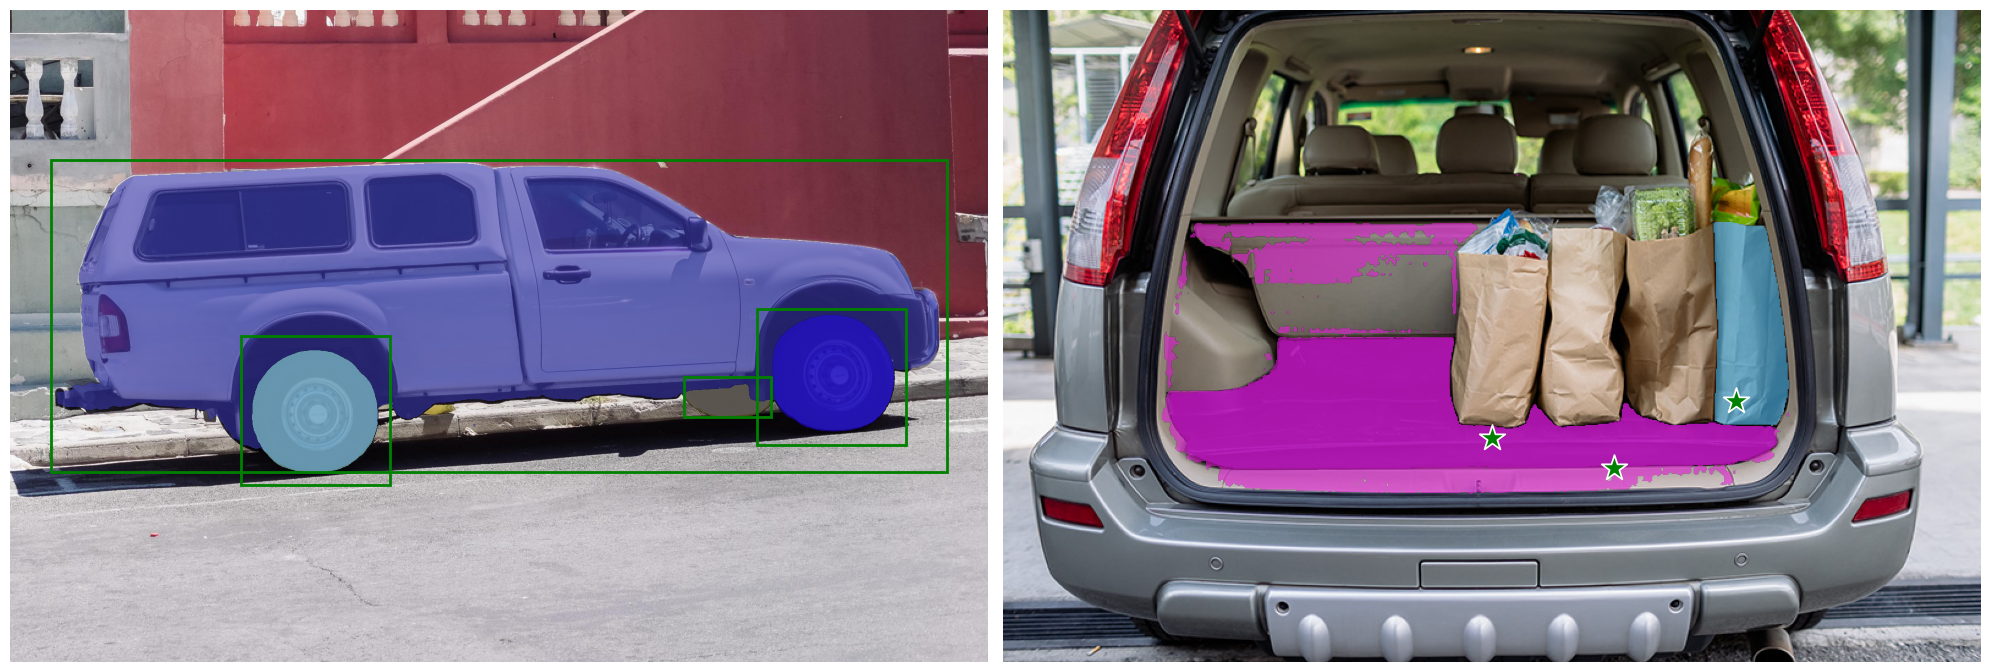

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(image1)
for mask in batched_output[0]['masks']:
    show_mask(mask.cpu().numpy(), ax[0], random_color=True)
for box in image1_boxes:
    show_box(box.cpu().numpy(), ax[0])
ax[0].axis('off')

ax[1].imshow(image2)
for mask in batched_output[1]['masks']:
    show_mask(mask.cpu().numpy(), ax[1], random_color=True)
# for box in image2_boxes:
#     show_box(box.cpu().numpy(), ax[1])

show_points(input_point, input_label, plt.gca())

ax[1].axis('off')

plt.tight_layout()
plt.show()

## 3--既有候选点+候选框

### 以下效果不行，必须需要框的数量和点的数量相同

In [48]:
image1 = cv2.imread('/Users/liudun/Desktop/anno_tools/AnnotationTools/notebooks/images/truck.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1_boxes = torch.tensor([
    [75, 275, 1725, 850],
    [425, 600, 700, 875],
    [1375, 550, 1650, 800],
    [1240, 675, 1400, 750],
], device=sam.device)

image2 = cv2.imread('/Users/liudun/Desktop/anno_tools/AnnotationTools/notebooks/images/groceries.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2_boxes = torch.tensor([
    [450, 170, 520, 350],
    # [350, 190, 450, 350],
    # [500, 170, 580, 350],
    # [580, 170, 640, 350],
], device=sam.device)

In [49]:
input_point = np.array([[400, 350],[500, 375], [600, 320]])
input_label = np.array([1, 1,1])

transformed_points = predictor.transform.apply_coords(input_point, image2.shape[:2])
in_points = torch.as_tensor(transformed_points, device=predictor.device)
in_labels = torch.tensor(input_label,dtype=torch.int, device=in_points.device)

In [50]:
batched_input = [
     {
         'image': prepare_image(image1, resize_transform, sam),
         'boxes': resize_transform.apply_boxes_torch(image1_boxes, image1.shape[:2]),
         'original_size': image1.shape[:2]
     },
     {
         'image': prepare_image(image2, resize_transform, sam),
         'boxes': resize_transform.apply_boxes_torch(image2_boxes, image2.shape[:2]),
        'point_coords':in_points[:, None, :],
        'point_labels':in_labels[:, None],
         'original_size': image2.shape[:2]
     }
]

In [51]:
batched_output = sam(batched_input, multimask_output=False)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 3 but got size 1 for tensor number 1 in the list.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(image1)
for mask in batched_output[0]['masks']:
    show_mask(mask.cpu().numpy(), ax[0], random_color=True)
for box in image1_boxes:
    show_box(box.cpu().numpy(), ax[0])
ax[0].axis('off')

ax[1].imshow(image2)
for mask in batched_output[1]['masks']:
    show_mask(mask.cpu().numpy(), ax[1], random_color=True)
for box in image2_boxes:
    show_box(box.cpu().numpy(), ax[1])

show_points(input_point, input_label, plt.gca())

ax[1].axis('off')

plt.tight_layout()
plt.show()

### 处理既有点又有box框的情况--可行

In [21]:
input_box = np.array([0, 0,1250, 825])
input_point=np.array([[100, 375], [1125, 625]])
point_labels=np.array([0, 0])

In [41]:
input_box = np.array([156,134.4,288.59999999999997,229.2])
input_point=np.array([[199.2,177.6],[200.2,250.6]])
point_labels=np.array([1,1])

In [42]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=point_labels,
    box=input_box[None, :],
    multimask_output=False,
)

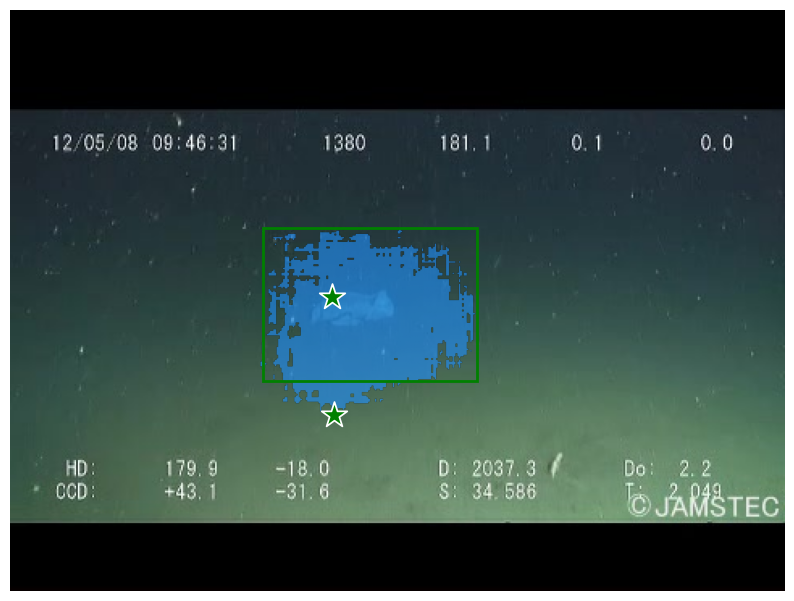

In [43]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, point_labels, plt.gca())
plt.axis('off')
plt.show()

In [44]:
masks.shape

(1, 360, 480)

## mask[true/false] to coco segment anno

### 参考

In [ ]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure

ground_truth_binary_mask = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=np.uint8)

fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask)
ground_truth_area = mask.area(encoded_ground_truth)
ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
contours = measure.find_contours(ground_truth_binary_mask, 0.5)

annotation = {
        "segmentation": [],
        "area": ground_truth_area.tolist(),
        "iscrowd": 0,
        "image_id": 123,
        "bbox": ground_truth_bounding_box.tolist(),
        "category_id": 1,
        "id": 1
    }

for contour in contours:
    contour = np.flip(contour, axis=1)
    segmentation = contour.ravel().tolist()
    annotation["segmentation"].append(segmentation)
    
print(json.dumps(annotation, indent=4))

### mine

In [48]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure
def get_coco_res(ground_truth_binary_mask):
    # ground_truth_binary_mask = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
    #                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
    #                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
    #                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
    #                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
    #                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
    #                                     [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
    #                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
    #                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=np.uint8)
    fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
    encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask.astype('uint8'))
    ground_truth_area = mask.area(encoded_ground_truth)
    ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
    contours = measure.find_contours(ground_truth_binary_mask, 0.5)
    annotation = {
            "segmentation": [],
            "area": ground_truth_area.tolist(),
            "iscrowd": 0,
            "image_id": 123,
            "bbox": ground_truth_bounding_box.tolist(),
            "category_id": 1,
            "id": 1,
            "size":[ground_truth_binary_mask.shape[0],ground_truth_binary_mask.shape[1]]
        }
    for contour in contours:
        contour = np.flip(contour, axis=1)
        segmentation = contour.ravel().tolist()
        annotation["segmentation"].append(segmentation)
        
    # print(json.dumps(annotation, indent=4))
    print(annotation)

In [49]:
get_coco_res(masks[0].astype(int))

{'segmentation': [[241.0, 138.5, 240.0, 138.5, 239.5, 138.0, 239.5, 137.0, 240.0, 136.5, 240.5, 136.0, 241.0, 135.5, 241.5, 136.0, 242.0, 136.5, 242.5, 137.0, 242.0, 137.5, 241.5, 138.0, 241.0, 138.5], [156.0, 137.5, 155.5, 137.0, 156.0, 136.5, 156.5, 137.0, 156.0, 137.5], [201.0, 249.5, 200.0, 249.5, 199.0, 249.5, 198.5, 249.0, 198.5, 248.0, 198.5, 247.0, 198.5, 246.0, 198.5, 245.0, 198.0, 244.5, 197.5, 244.0, 197.0, 243.5, 196.0, 243.5, 195.0, 243.5, 194.5, 244.0, 194.0, 244.5, 193.5, 245.0, 193.0, 245.5, 192.5, 246.0, 192.5, 247.0, 192.5, 248.0, 192.0, 248.5, 191.5, 248.0, 191.5, 247.0, 191.5, 246.0, 191.5, 245.0, 191.5, 244.0, 191.0, 243.5, 190.5, 243.0, 190.0, 242.5, 189.0, 242.5, 188.0, 242.5, 187.0, 242.5, 186.0, 242.5, 185.0, 242.5, 184.0, 242.5, 183.5, 242.0, 183.0, 241.5, 182.5, 241.0, 182.5, 240.0, 183.0, 239.5, 183.5, 239.0, 183.5, 238.0, 183.5, 237.0, 183.0, 236.5, 182.5, 236.0, 182.0, 235.5, 181.0, 235.5, 180.0, 235.5, 179.5, 236.0, 179.0, 236.5, 178.5, 237.0, 178.5, 238.

## 测试

In [ ]:
def get_segboundery(s):
        target_segboundery=np.where(s, 255, 0)
        img=cv2.Canny(np.uint8(target_segboundery),50,100)
        img[img < 255] = 0
        row_indices, col_indices = np.where(img == 255)
        return list(zip(row_indices, col_indices))

In [9]:
masks.shape

(1, 1200, 1800)

In [10]:
masks

array([[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

In [ ]:
get_segboundery(masks)

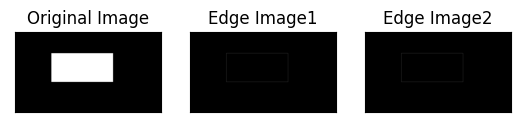

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/Users/liudun/Desktop/anno_tools/AnnotationTools/WX20230420-162122@2x.png')
edges = cv2.Canny(img,100,200)
edges2 = cv2.Canny(img,50,200)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image1'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges2,cmap = 'gray')
plt.title('Edge Image2'), plt.xticks([]), plt.yticks([])
plt.show()


In [45]:
for i in range(0,10,2):
	print(i)

0
2
4
6
8


In [47]:
ground_truth_binary_mask = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                            [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                            [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                            [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                            [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                            [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                            [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                            [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                            [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=np.uint8)
print(ground_truth_binary_mask.shape[0])

9
